# Week 2 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [18]:
df = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [19]:
print(df.shape)
df.head()

(430, 31)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2
0,Aaron Jones,GNB,RB,26,2,2,0,0,0,0,0,34,234,14.80,3,14,8,78,16.50,1,1,0,4,0,0,59.20,1,1,55.20,13.60,41.60
1,Calvin Ridley,ATL,WR,26,2,2,0,0,0,0,0,1,-1,-1.00,0,22,16,239,23.40,4,0,0,4,0,0,55.80,1,2,47.80,24.90,22.90
2,Alvin Kamara,NOR,RB,25,2,2,0,0,0,0,0,25,95,11.00,3,17,14,146,14.30,1,0,0,4,0,0,55.10,2,3,48.10,18.70,29.40
3,Christian McCaffrey,CAR,RB,24,2,2,0,0,0,0,0,41,156,11.00,4,9,7,67,14.70,0,0,0,4,0,0,49.80,3,4,46.20,25.40,20.80
4,Russell Wilson,SEA,QB,32,2,2,52,63,610,9,1,8,68,13.00,0,0,0,0,0.00,0,1,0,0,0,0,66.20,1,5,66.20,31.80,34.40


In [20]:
print(defense.shape)
defense.head()

(32, 25)


,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2
0,Baltimore Ravens,28,125,4.90,610,44,189,4.30,0,75,6.20,46,10.10,464,2,3,2,66.70,5,2,3,6,30.00,15.00,15.00
1,Los Angeles Chargers,41,137,5.20,709,50,247,4.90,1,83,6.00,50,9.90,495,2,3,1,33.30,2,1,1,4,12.00,11.00,1.00
2,Pittsburgh Steelers,43,136,4.50,610,46,133,2.90,0,80,6.90,45,12.30,555,4,7,2,28.60,4,3,1,10,21.00,8.00,13.00
3,Arizona Cardinals,43,121,5.60,682,48,240,5.00,1,66,7.30,38,12.70,482,3,7,2,28.60,2,0,2,7,13.00,4.00,9.00
4,Los Angeles Rams,43,138,5.40,743,53,257,4.80,3,82,6.20,51,10.00,508,1,7,4,57.10,3,2,1,3,11.00,4.00,7.00


In [28]:
no_games = 2

defense['PtspGame'] = defense['Ttl_Pts_Allowed']/no_games
defense['YdspGame'] = defense['Ttl_Yds']/no_games
defense['RushYdspGame'] = defense['Rushing_Yds']/no_games
defense['PassYdspGame'] = defense['Passing_Yds']/no_games

## QB Analysis

In [21]:
quarterbacks = df[df['Position'] == 'QB']
quarterbacks['AttpGame'] = quarterbacks['PassesAttempted']/quarterbacks['Games']
quarterbacks['CompletionspGame'] = quarterbacks['CompletedPasses']/quarterbacks['Games']
quarterbacks['YdspGame'] = quarterbacks['PassingYds']/quarterbacks['Games']
quarterbacks['TDspGame'] = quarterbacks['PassingYds']/quarterbacks['Games']
quarterbacks.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AttpGame,CompletionspGame,YdspGame,TDspGame
4,Russell Wilson,SEA,QB,32,2,2,52,63,610,9,1,8,68,13.00,0,0,0,0,0.00,0,1,0,0,0,0,66.20,1,5,66.20,31.80,34.40,31.50,26.00,305.00,305.00
6,Josh Allen,BUF,QB,24,2,2,57,81,729,6,0,18,75,5.70,1,0,0,0,0.00,0,2,2,1,0,0,62.70,2,7,62.70,28.20,34.50,40.50,28.50,364.50,364.50
8,Cam Newton,NWE,QB,31,2,2,45,63,552,1,1,26,122,10.90,4,0,0,0,0.00,0,0,0,4,0,0,61.30,3,9,61.30,25.70,35.60,31.50,22.50,276.00,276.00
9,Kyler Murray,ARI,QB,23,2,2,52,78,516,2,2,21,158,12.20,3,0,0,0,0.00,0,0,0,3,0,0,60.40,4,10,60.40,27.30,33.10,39.00,26.00,258.00,258.00
11,Dak Prescott,DAL,QB,27,2,2,59,86,716,2,0,8,48,6.00,3,0,0,0,0.00,0,1,1,3,0,0,57.40,5,12,57.40,17.60,39.80,43.00,29.50,358.00,358.00


In [32]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,AttpGame,CompletionspGame,YdspGame,TDspGame
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,28.95,1.85,1.62,37.67,56.73,421.02,2.75,1.12,6.88,29.95,0.40,0.05,0.05,0.20,0.00,0.72,0.28,0.40,0.03,0.12,29.74,19.65,221.20,221.20
std,5.57,0.36,0.74,18.78,27.56,206.43,2.17,1.20,6.02,35.04,0.93,0.22,0.22,2.43,0.00,0.93,0.51,0.93,0.16,0.33,13.07,8.82,99.86,99.86
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,0.00,0.00,0.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.75,2.00,2.00,28.25,46.25,356.75,1.00,0.00,3.00,6.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.12,17.62,199.62,199.62
50%,27.50,2.00,2.00,44.50,66.00,498.50,2.00,1.00,5.00,19.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.50,22.25,256.00,256.00
75%,32.00,2.00,2.00,51.00,75.25,540.25,4.00,2.00,8.00,42.25,0.00,0.00,0.00,0.00,0.00,1.00,0.25,0.00,0.00,0.00,37.62,25.50,270.62,270.62
max,43.00,2.00,2.00,61.00,97.00,729.00,9.00,4.00,26.00,158.00,4.00,1.00,1.00,14.00,0.00,3.00,2.00,4.00,1.00,1.00,48.50,30.50,364.50,364.50


In [23]:
quarterbacks[quarterbacks['Player'].isin(['Dak Prescott', 'Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AttpGame,CompletionspGame,YdspGame,TDspGame
11,Dak Prescott,DAL,QB,27,2,2,59,86,716,2,0,8,48,6.00,3,0,0,0,0.00,0,1,1,3,0,0,57.40,5,12,57.40,17.60,39.80,43.00,29.50,358.00,358.00
31,Aaron Rodgers,GNB,QB,37,2,2,50,74,604,6,0,3,14,10.70,0,1,1,-6,-6.00,0,0,0,0,0,0,49.50,7,32,49.00,30.80,18.20,37.00,25.00,302.00,302.00


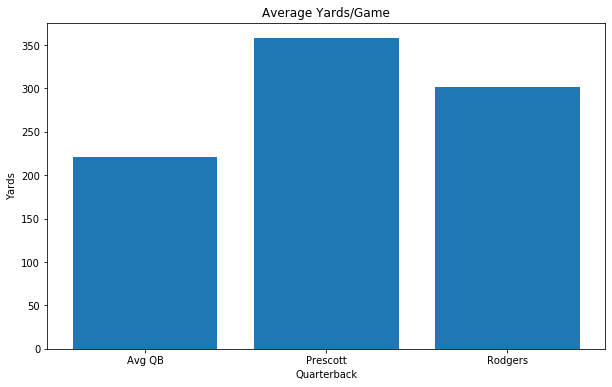

In [35]:
average = quarterbacks['YdspGame'].mean()
dak = quarterbacks['YdspGame'][11]
aaron = quarterbacks['YdspGame'][31]

x = ['Avg QB', 'Prescott', 'Rodgers']
y = average, dak, aaron

plt.figure(figsize = (10,6))

plt.bar(x, y)

plt.title('Average Yards/Game')
plt.xlabel('Quarterback')
plt.ylabel('Yards')
plt.show;

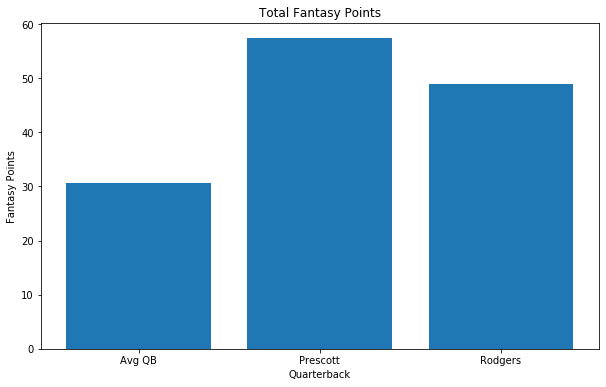

In [36]:
average = quarterbacks['Ttl_Fant'].mean()
dak = quarterbacks['Ttl_Fant'][11]
aaron = quarterbacks['Ttl_Fant'][31]

x = ['Avg QB', 'Prescott', 'Rodgers']
y = average, dak, aaron

plt.figure(figsize = (10,6))

plt.bar(x, y)

plt.title('Total Fantasy Points')
plt.xlabel('Quarterback')
plt.ylabel('Fantasy Points')
plt.show;

In Week 3, Dallas will be playing Seattle where Green Bay will go up against the New Orleans Saints. Both are formidable opponents so I want to hedege my bets on the defense that has allowed more passing yards & yards per passing play.

In [30]:
defense[defense['TEAM'].isin(['Seattle Seahawks', 'New Orleans Saints'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
19,Seattle Seahawks,65,147,6.60,970,46,139,3.00,3,98,8.60,67,12.60,847,3,9,6,66.70,3,2,1,3,9.00,6.00,3.00,32.50,485.00,69.50,423.50
21,New Orleans Saints,66,141,4.90,685,61,202,3.30,2,74,7.00,51,10.20,521,5,7,6,85.70,4,2,2,6,19.00,15.00,4.00,33.00,342.50,101.00,260.50


This one is a no brainer - Seattle has allowed on average 424 passing yards so far this season where the Saints are only letting 261 yards per game.

## Runningbacks

In [37]:
runningbacks = df[df['Position'] == 'RB']

In [39]:
runningbacks['AvgAtt_pGame'] = runningbacks['RushingAttempts']/runningbacks['Games']
runningbacks['AvgYds_pGame'] = runningbacks['RushingYds']/runningbacks['Games']
runningbacks['Targets_pGame'] = runningbacks['Targeted']/runningbacks['Games']
runningbacks['Receptions_pGame'] = runningbacks['Receptions']/runningbacks['Games']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [46]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AvgAtt_pGame,AvgYds_pGame,Targets_pGame,Receptions_pGame
0,Aaron Jones,GNB,RB,26,2,2,0,0,0,0,0,34,234,14.80,3,14,8,78,16.50,1,1,0,4,0,0,59.20,1,1,55.20,13.60,41.60,17.00,117.00,7.00,4.00
2,Alvin Kamara,NOR,RB,25,2,2,0,0,0,0,0,25,95,11.00,3,17,14,146,14.30,1,0,0,4,0,0,55.10,2,3,48.10,18.70,29.40,12.50,47.50,8.50,7.00
3,Christian McCaffrey,CAR,RB,24,2,2,0,0,0,0,0,41,156,11.00,4,9,7,67,14.70,0,0,0,4,0,0,49.80,3,4,46.20,25.40,20.80,20.50,78.00,4.50,3.50
5,Josh Jacobs,LVR,RB,22,2,2,0,0,0,0,0,52,181,7.80,3,9,7,63,9.00,0,0,0,3,0,0,45.90,4,6,42.40,31.90,10.50,26.00,90.50,4.50,3.50
7,Ezekiel Elliott,DAL,RB,25,2,2,0,0,0,0,0,44,185,6.00,2,11,9,64,8.10,1,2,1,3,0,0,45.40,5,8,40.90,24.70,16.20,22.00,92.50,5.50,4.50


In [45]:
runningbacks[runningbacks['Player'].isin(['Derrick Henry', 'Chris Carson', 'Mark Ingram', "D'Andre Swift"])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AvgAtt_pGame,AvgYds_pGame,Targets_pGame,Receptions_pGame
13,Chris Carson,SEA,RB,26,2,2,0,0,0,0,0,23,93,4.40,0,9,9,81,9.00,3,0,0,3,0,0,39.90,8,14,35.40,18.60,16.80,11.50,46.50,4.50,4.50
69,Derrick Henry,TEN,RB,26,2,2,0,0,0,0,0,56,200,8.70,0,5,3,15,5.00,0,0,0,0,0,0,23.00,23,70,21.50,13.10,8.40,28.00,100.00,2.50,1.50
106,Mark Ingram,BAL,RB,31,2,2,0,0,0,0,0,19,84,8.20,1,3,2,22,11.00,0,0,0,1,0,0,17.60,31,,0.00,0.00,0.00,9.50,42.00,1.50,1.00
110,D'Andre Swift,DET,RB,21,2,0,0,0,0,0,0,8,20,7.00,1,10,8,75,12.80,0,0,0,1,0,0,19.50,33,,15.50,8.30,7.20,4.00,10.00,5.00,4.00
